# David Gamaliel Arcos Bravo
# Fransisco Alfredo Castrellon Carrillo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

from collections import deque

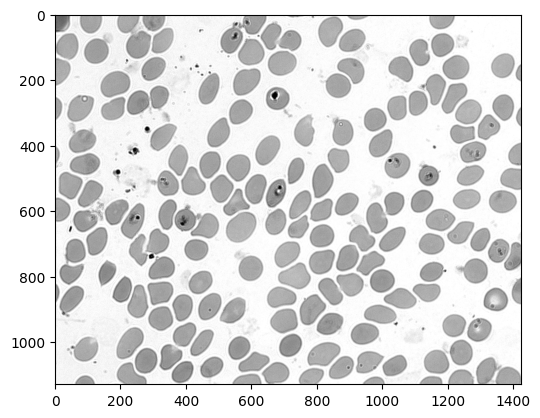

In [2]:
# Read image
img = cv2.imread('images/blood-cells.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')

(array([2.57000e+02, 7.20000e+01, 7.50000e+01, 7.50000e+01, 3.70000e+01,
        4.10000e+01, 2.70000e+01, 1.50000e+01, 1.80000e+01, 2.00000e+01,
        2.50000e+01, 1.00000e+01, 1.20000e+01, 1.10000e+01, 1.50000e+01,
        1.70000e+01, 1.20000e+01, 1.90000e+01, 1.30000e+01, 7.00000e+00,
        1.10000e+01, 1.30000e+01, 1.30000e+01, 1.70000e+01, 8.00000e+00,
        1.00000e+01, 2.00000e+01, 1.20000e+01, 1.70000e+01, 1.70000e+01,
        1.20000e+01, 2.30000e+01, 1.30000e+01, 1.80000e+01, 2.20000e+01,
        2.00000e+01, 1.40000e+01, 1.60000e+01, 1.30000e+01, 1.50000e+01,
        1.40000e+01, 2.20000e+01, 1.60000e+01, 1.50000e+01, 1.80000e+01,
        2.10000e+01, 1.30000e+01, 2.90000e+01, 2.40000e+01, 2.10000e+01,
        1.80000e+01, 2.20000e+01, 1.60000e+01, 2.00000e+01, 2.60000e+01,
        2.20000e+01, 2.70000e+01, 2.00000e+01, 3.40000e+01, 1.60000e+01,
        2.40000e+01, 2.00000e+01, 2.40000e+01, 3.40000e+01, 2.50000e+01,
        3.30000e+01, 2.50000e+01, 3.70000e+01, 3.00

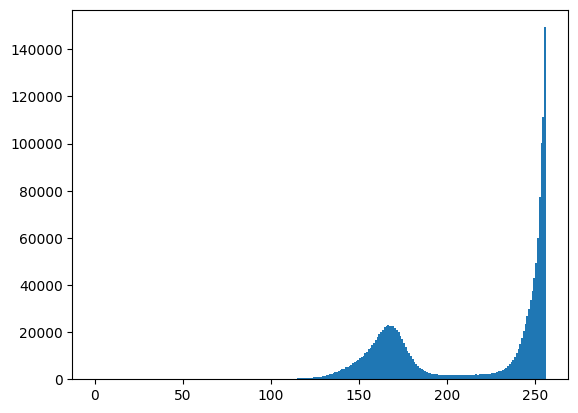

In [3]:
# PLot histogram
plt.hist(img.ravel(), 256, [0, 256])

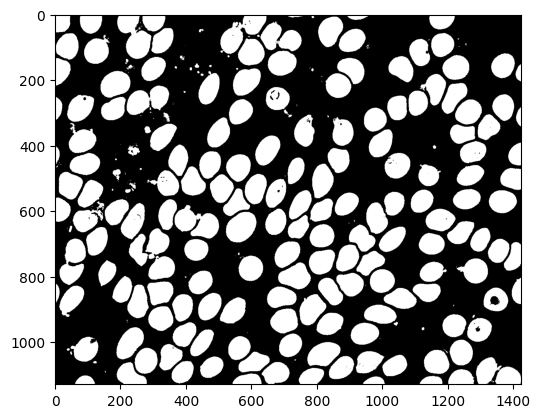

In [4]:
# Thresholding
ret, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(thresh, cmap='gray')

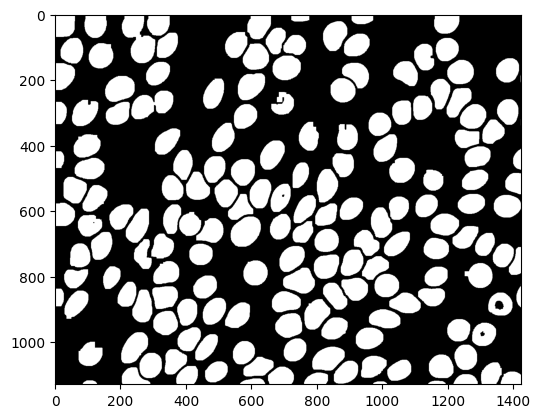

In [13]:
# Apply morphology
close = thresh.copy()
kernel = np.ones((2,2), np.uint8)
close = cv2.morphologyEx(close, cv2.MORPH_CLOSE, kernel, iterations=2)
kernel = np.ones((8, 8), np.uint8)
opening = close.copy()
thresh = cv2.morphologyEx(opening, cv2.MORPH_OPEN, kernel, iterations=2)
close = opening.copy()
kernel = np.ones((2,2), np.uint8)
close = cv2.morphologyEx(close, cv2.MORPH_CLOSE, kernel, iterations=2)
plt.imshow(close, cmap='gray')

In [14]:
# Counting
contours, hierarchy = cv2.findContours(close, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print('Number of cells: ', len(contours))

Number of cells:  175


In [7]:
n,m = img.shape
count = 0
visited = close.copy()
for i in range(n):
    for j in range(m):
        if visited[i,j] == 255:
            q = deque()
            q.append((i,j))
            count += 1
            while len(q) > 0:
                x,y = q.popleft()
                if x < 0 or x >= n or y < 0 or y >= m:
                    continue
                coords = [(x-1,y-1), (x-1,y), (x-1,y+1), (x,y-1), (x,y+1), (x+1,y-1), (x+1,y), (x+1,y+1)]
                if visited[x,y] == 255:
                    visited[x,y] = 0
                    for coord in coords:
                        q.append(coord)

print('Number of cells: ', count)

Number of cells:  288


[[  0   0   0]
 [255   1 255]
 [  1   1   1]]
[[  0 255   1]
 [  0   1   1]
 [  0 255   1]]


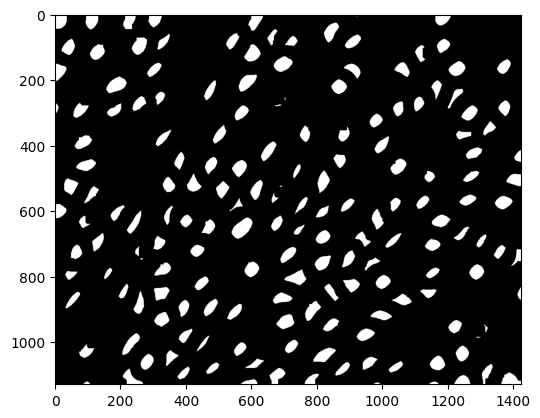

In [8]:
slim = close.copy()
# Slimming using erosion
k1 = np.array([[0,0,0],
                 [-1,1,-1],
                 [1,1,1]], np.uint8)
k2 = np.array([  [-1,0,0],
                 [1,1,0],
                 [1,1,-1]], np.uint8)
k3 = np.array([[0,0,0],
                 [-1,1,-1],
                 [1,1,1]], np.uint8)
k4 = np.array([  [1,-1,0],
                 [1,1,0],
                 [1,-1,0]], np.uint8)
print(k1)
print(k1.T)
for i in range(2):
    slim = cv2.erode(slim, k1)
    slim = cv2.erode(slim, k2)
    slim = cv2.erode(slim, k3)
    slim = cv2.erode(slim, k4)
    slim = cv2.erode(slim, k1.T)
    slim = cv2.erode(slim, k2.T)
    slim = cv2.erode(slim, k3.T)
    slim = cv2.erode(slim, k4.T)
plt.imshow(slim, cmap='gray')